In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
!head -n 10 /home/kyohei/pydata-book/ch02/names/yob1950.txt

In [3]:
years = range(1880,2011)

pieces = []
columns = ['name','sex','births']

for year in years:
    path = '/home/kyohei/pydata-book/ch02/names/yob%d.txt' %year
    frame = pd.read_csv(path,names=columns)
    
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces,ignore_index=True)

In [4]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [5]:
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc=sum)

In [6]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


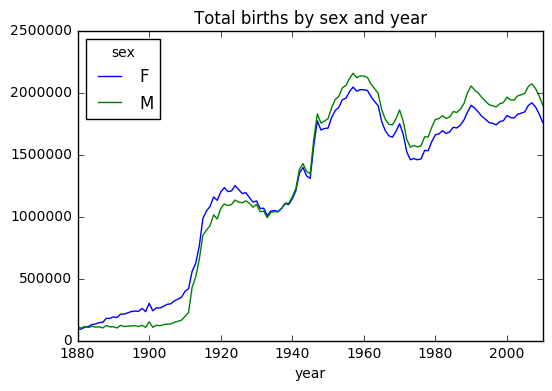

In [7]:
total_births.plot(title='Total births by sex and year')

In [8]:
def add_prop(group):
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year','sex']).apply(add_prop)

In [9]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [10]:
def get_tops(group):
    return group.sort_index(by='births',ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_tops)

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


In [16]:
pieces = []
for year,group in names.groupby(['year','sex']):
    pieces.append(group.sort_index(by='births',ascending=False)[:1000])
top1000 = pd.concat(pieces,ignore_index=True)

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [17]:
top1000.shape

(261877, 5)

In [18]:
boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex=='F']

In [24]:
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)

In [25]:
total_births.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f78327ae8d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f7810a76d50>], dtype=object)

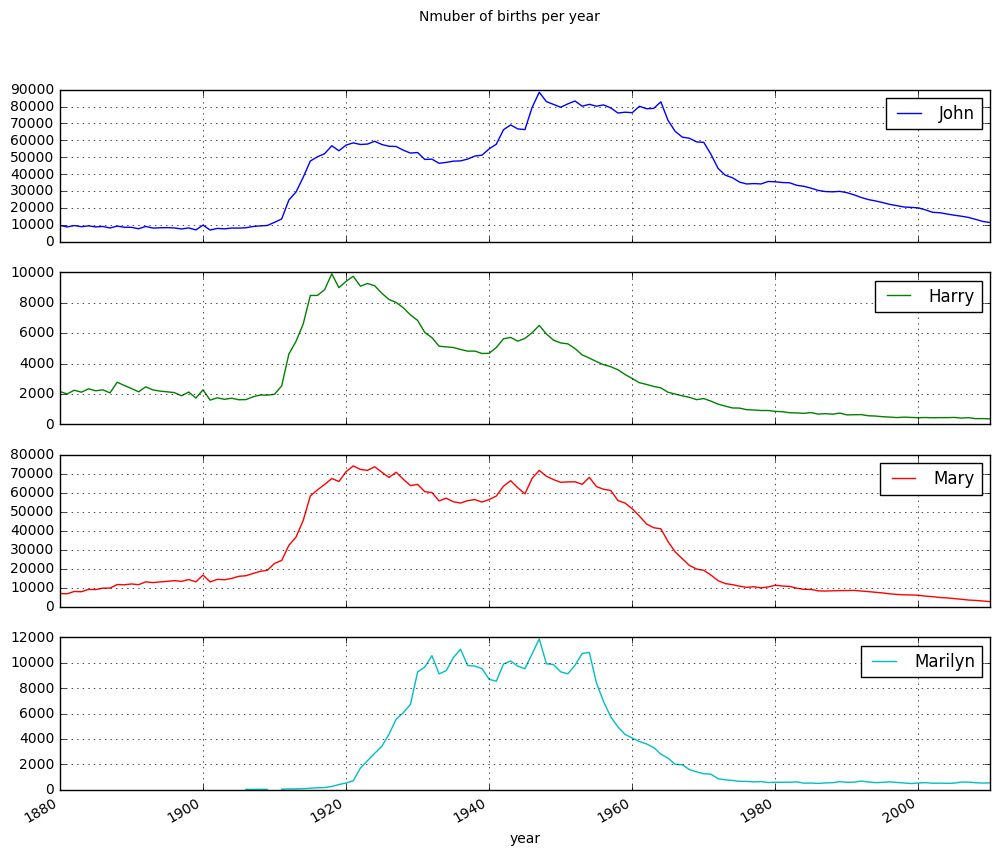

In [27]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True,figsize=(12,10),grid=True,title='Nmuber of births per year')

In [28]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)

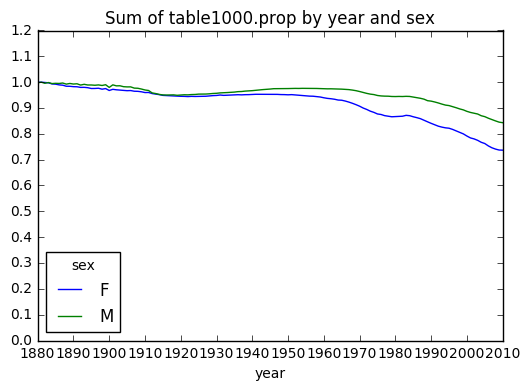

In [30]:
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

In [31]:
df = boys[boys.year==2010]

In [32]:
df.head()

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887


In [34]:
prop_cumsum = df.sort_index(by='prop',ascending=False).prop.cumsum()
prop_cumsum[:10]

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [36]:
prop_cumsum.searchsorted(0.5)

array([116])

In [37]:
df = boys[boys.year==1900]

In [38]:
in1900 = df.sort_index(by='prop',ascending=False).prop.cumsum()

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


In [40]:
(in1900.searchsorted(0.5)+1)[0]

25

In [44]:
def get_quantile_count(group,q=0.5):
    group = group.sort_index(by='prop',ascending=False)
    return (group.prop.cumsum().searchsorted(q) + 1)[0]

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


In [46]:
diversity = diversity.unstack('sex')

In [47]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


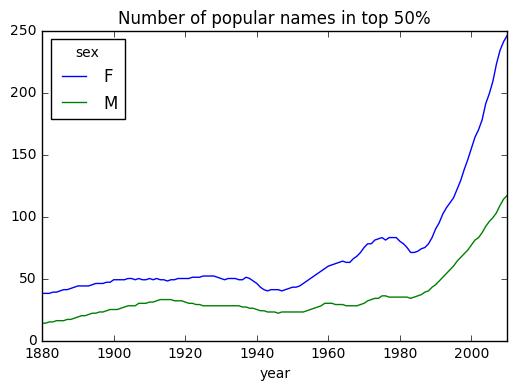

In [48]:
diversity.plot(title='Number of popular names in top 50%')

In [49]:
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)

In [53]:
table = names.pivot_table('births',index=last_letters,columns=['sex','year'],aggfunc=sum)

In [54]:
subtable = table.reindex(columns=[1910,1960,2010],level='year')

In [55]:
subtable.head()

sex          F                            M                    
year      1910      1960      2010     1910      1960      2010
name                                                           
a     108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b          NaN     694.0     450.0    411.0    3912.0   38859.0
c          5.0      49.0     946.0    482.0   15476.0   23125.0
d       6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e     133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [57]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [59]:
letter_prob = subtable / subtable.sum().astype(float)

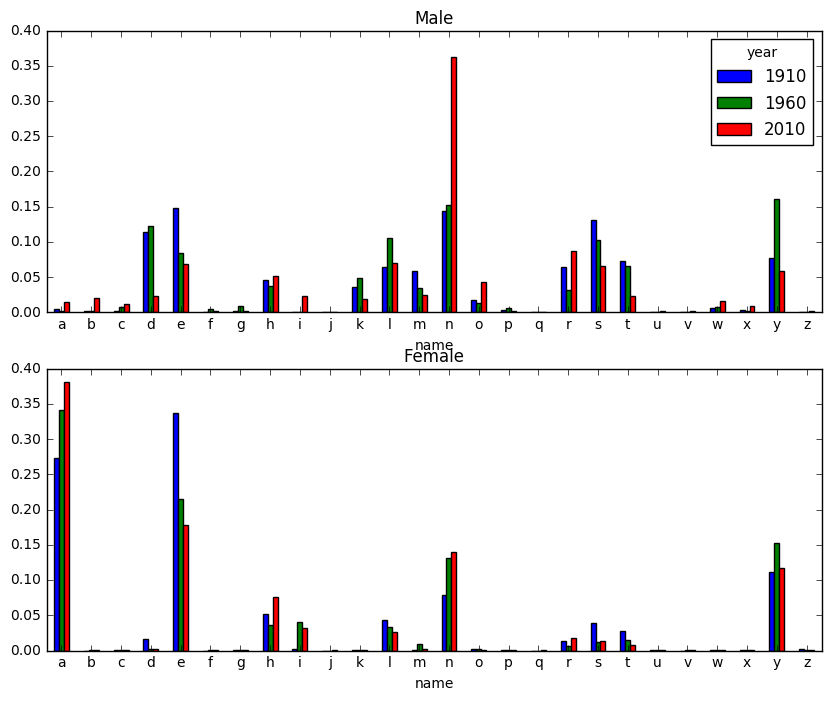

In [60]:
fig,axes = plt.subplots(2,1,figsize=(10,8))
letter_prob['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prob['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)

In [61]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.ix[['d','n','y'],'M'].T
dny_ts.head()

name,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


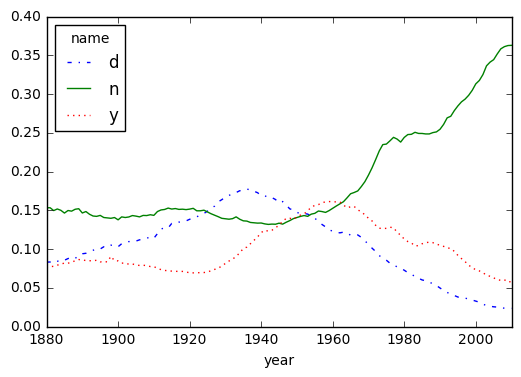

In [62]:
dny_ts.plot(style={'d':'-.','n':'-','y':':'})

In [63]:
all_names = top1000.name.unique()

In [65]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [66]:
leslley_like = all_names[mask]

In [67]:
leslley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [68]:
filtered = top1000[top1000.name.isin(leslley_like)]

In [69]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [70]:
filtered.head()

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083


In [71]:
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc=sum)

In [72]:
table = table.div(table.sum(1),axis=0)

In [73]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


In [77]:
table = table.fillna(0)

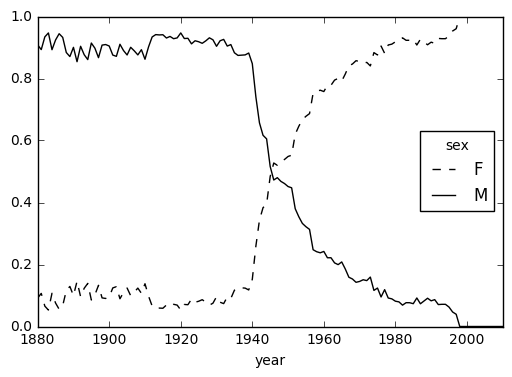

In [79]:
table.plot(style={'M':'k-','F':'k--'})